<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 3. EDA</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean_1.csv")
display(df.sample(6).T)
display(df.shape)

,4857,1791,106,4924,4339,3017
gender,Female,Female,Female,Male,Female,Female
SeniorCitizen,0,0,0,0,0,0
Partner,1,1,1,1,1,0
Dependents,1,0,1,1,0,0
tenure,7,23,72,27,42,2
PhoneService,1,1,1,1,1,1
MultipleLines,Yes,Yes,Yes,No,Yes,No
InternetService,DSL,DSL,Fiber_optic,Fiber_optic,DSL,No
OnlineSecurity,No,No,Yes,Yes,Yes,No_internet
OnlineBackup,No,No,Yes,Yes,Yes,No_internet


(7032, 20)

## Let's seperate "categorical" and "numerical" variable

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# define caterogical columns and numeric columns
# categorical=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
#              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# numerical=['tenure', 'MonthlyCharges', 'TotalCharges']

## Explore categorical features 


### personal data - gender, Senior citizen, Partner and dependents
What can we learn about the feature personal data and it's possible affect on 'churn'

In [5]:
def get_bar_plot(col):
    gb = df.groupby(col)["Churn"].value_counts().to_frame().rename(
        {"Churn": "Number of Customers"}, axis=1).reset_index()
    sns.barplot(x=col , y="Number of Customers", data=gb , hue="Churn", palette=sns.color_palette(
        "coolwarm", 8))
    if col == 'PaymentMethod':
        plt.xticks(rotation=70)
    plt.show()

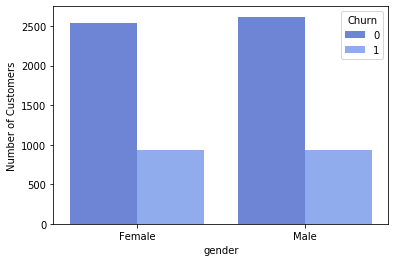

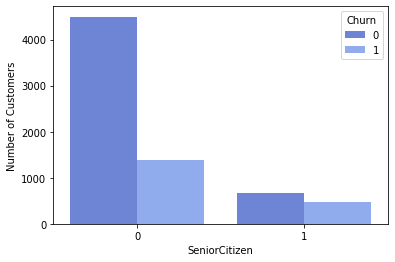

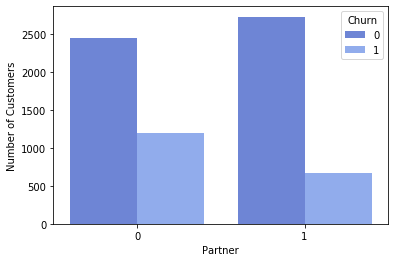

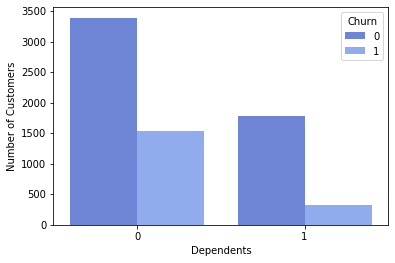

In [6]:
get_bar_plot("gender")
get_bar_plot("SeniorCitizen")
get_bar_plot("Partner")
get_bar_plot("Dependents")

### Phone - PhoneService, MultipleLines, Contract, PaperlessBilling and PaymentMethod
What can we learn about the feature like Phone Service and it's possible affect on 'churn'

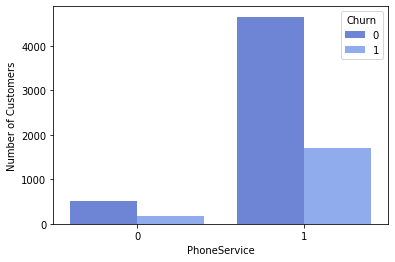

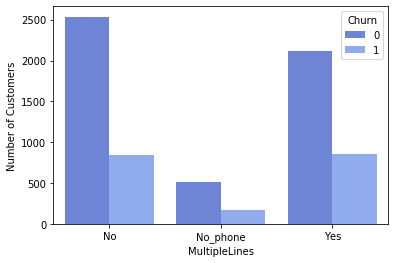

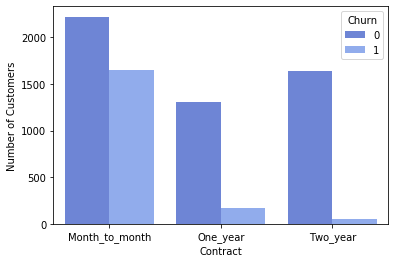

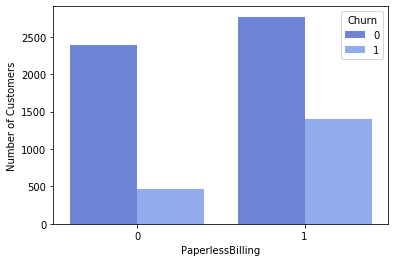

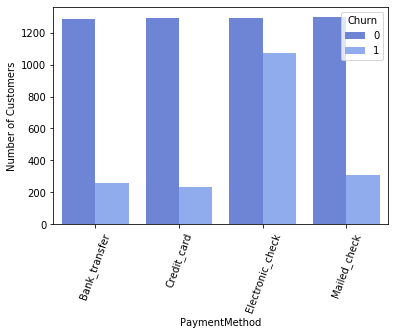

In [7]:
get_bar_plot("PhoneService")
get_bar_plot("MultipleLines")
get_bar_plot("Contract")
get_bar_plot("PaperlessBilling")
get_bar_plot("PaymentMethod")

### Internet - InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies
What can we learn about the feature of Internet Service and it's possible affect on 'churn'

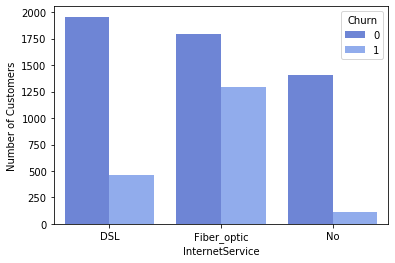

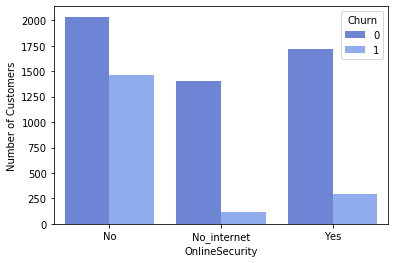

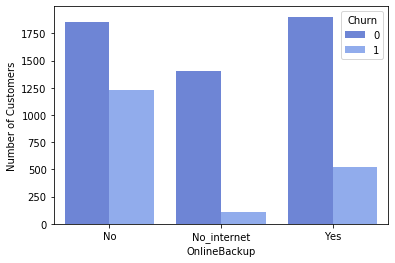

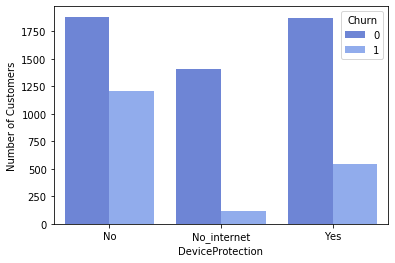

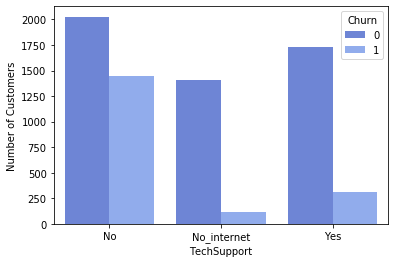

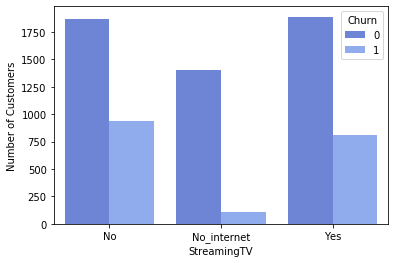

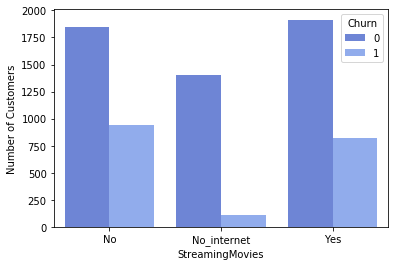

In [8]:
get_bar_plot("InternetService")
get_bar_plot("OnlineSecurity")
get_bar_plot("OnlineBackup")
get_bar_plot("DeviceProtection")
get_bar_plot("TechSupport")
get_bar_plot("StreamingTV")
get_bar_plot("StreamingMovies")

## Explore numerical features

### tenure
What can we learn about the feature "tenure" and it's possible affect on 'churn'

### Monthly Charges
What can we learn about the feature "MonthlyCharges" and it's possible affect on 'churn'

### Total Charges
What can we learn about the feature "TotalCharges" and it's possible affect on 'churn'

In [9]:
# imports
#import plotly.graph_objs as go
#
##function  for histogram for customer attrition types
#def histogram(column) :
#    trace1 = go.Histogram(x  = churn[column],
#                          histnorm= "percent",
#                          name = "Churn Customers",
#                          marker = dict(line = dict(width = .5,
#                                                    color = "black"
#                                                    )
#                                        ),
#                         opacity = .9 
#                         ) 
#    
#    trace2 = go.Histogram(x  = not_churn[column],
#                          histnorm = "percent",
#                          name = "Non churn customers",
#                          marker = dict(line = dict(width = .5,
#                                              color = "black"
#                                             )
#                                 ),
#                          opacity = .9
#                         )
#    
#    data = [trace1,trace2]
#    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
#                            plot_bgcolor  = "rgb(243,243,243)",
#                            paper_bgcolor = "rgb(243,243,243)",
#                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
#                                             title = column,
#                                             zerolinewidth=1,
#                                             ticklen=5,
#                                             gridwidth=2
#                                            ),
#                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
#                                             title = "percent",
#                                             zerolinewidth=1,
#                                             ticklen=5,
#                                             gridwidth=2
#                                            ),
#                           )
#                      )
#    fig  = go.Figure(data=data,layout=layout)
#    
#    py.iplot(fig)
#
#for i in numerical:
#    histogram(i)

## correlation 